In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


In [49]:
# Let's define a simple function that loads a single dataset

def load_raw_data(audio: bool = True, map: bool = True):
    csv_path = 'data/full_corrected_w_gender.csv' if audio else 'data/no_audio_corrected_w_gender.csv'
    # Load the entire csv file
    data = pd.read_csv(csv_path)
    if map: data['Sex_Category'] = data['Sex_Category'].map(lambda x: 0 if x.lower()=='male' else 1)
    data = data.drop('id', axis=1)

    return data

# Audio

## Variables statistically significant
### p >= 0.95 & p <= 0.05

In [ ]:
df = load_raw_data()
data = pd.DataFrame(columns=['Variable', 'Corr', 'pvalue'])
for col in df.columns:
    if col != 'Sex_Category':
        info = stats.pointbiserialr(df['Sex_Category'], df[col])
        info = [col, info.statistic, info.pvalue]
        data.loc[len(data.index)] = info

In [26]:
p_val_high = data[np.abs(data['pvalue']) >= 0.95]
p_val_low =  data[np.abs(data['pvalue']) <= 0.05]
p_values = p_val_high.append(p_val_low).sort_values(by='Corr')


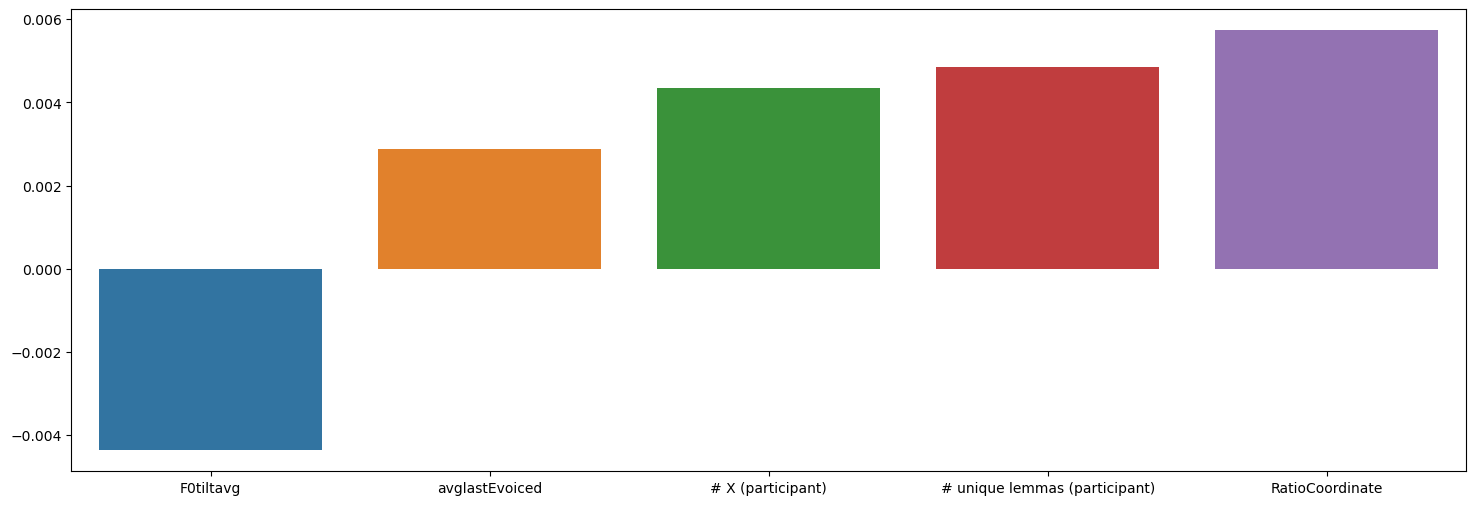

In [27]:
p_val_high = p_val_high.sort_values(by='Corr')
plt.figure(figsize=(18,6))
sns.barplot(y=p_val_high['Corr'].values, x=p_val_high['Variable'].values)
#plt.xticks(rotation=90)
plt.show()

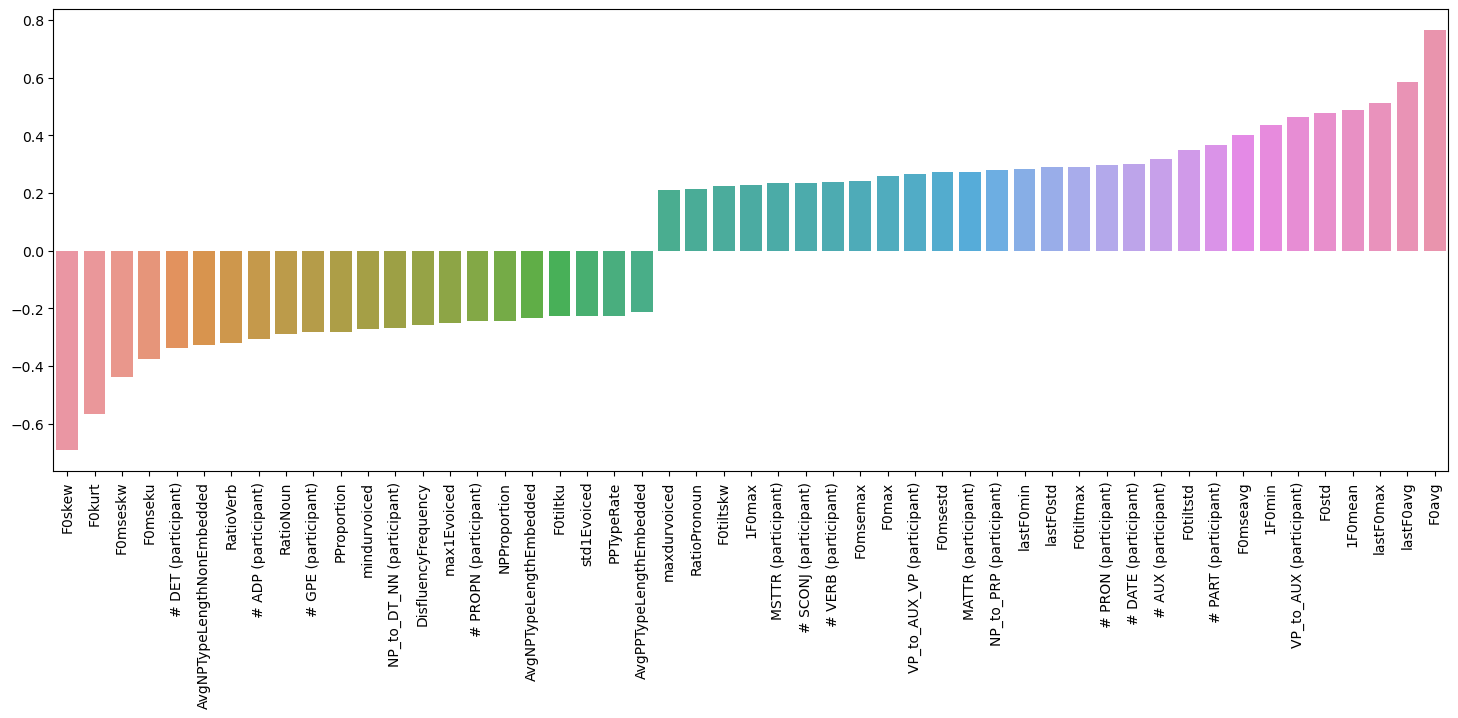

In [29]:
p_val_low = p_val_low.sort_values(by='Corr')
plt.figure(figsize=(18,6))
sns.barplot(y=p_val_low['Corr'].values, x=p_val_low['Variable'].values)
plt.xticks(rotation=90)
plt.show()

## Visualization

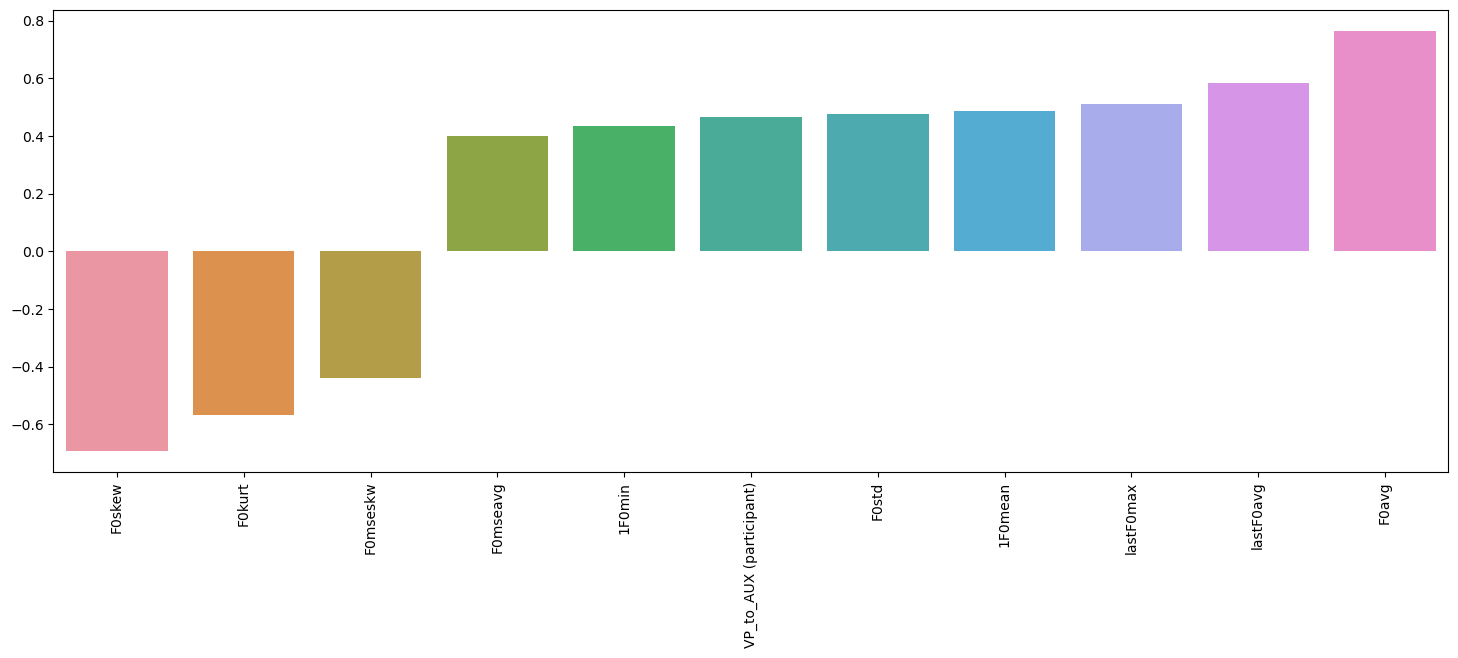

In [33]:
# Using only the ones with high correlation

to_plot = load_raw_data(map=False)
high_corr = p_val_low[np.abs(data['Corr']) >= 0.4].sort_values(by='Corr')

plt.figure(figsize=(18,6))
sns.barplot(y=high_corr['Corr'].values, x=high_corr['Variable'].values)
plt.xticks(rotation=90)
plt.show()

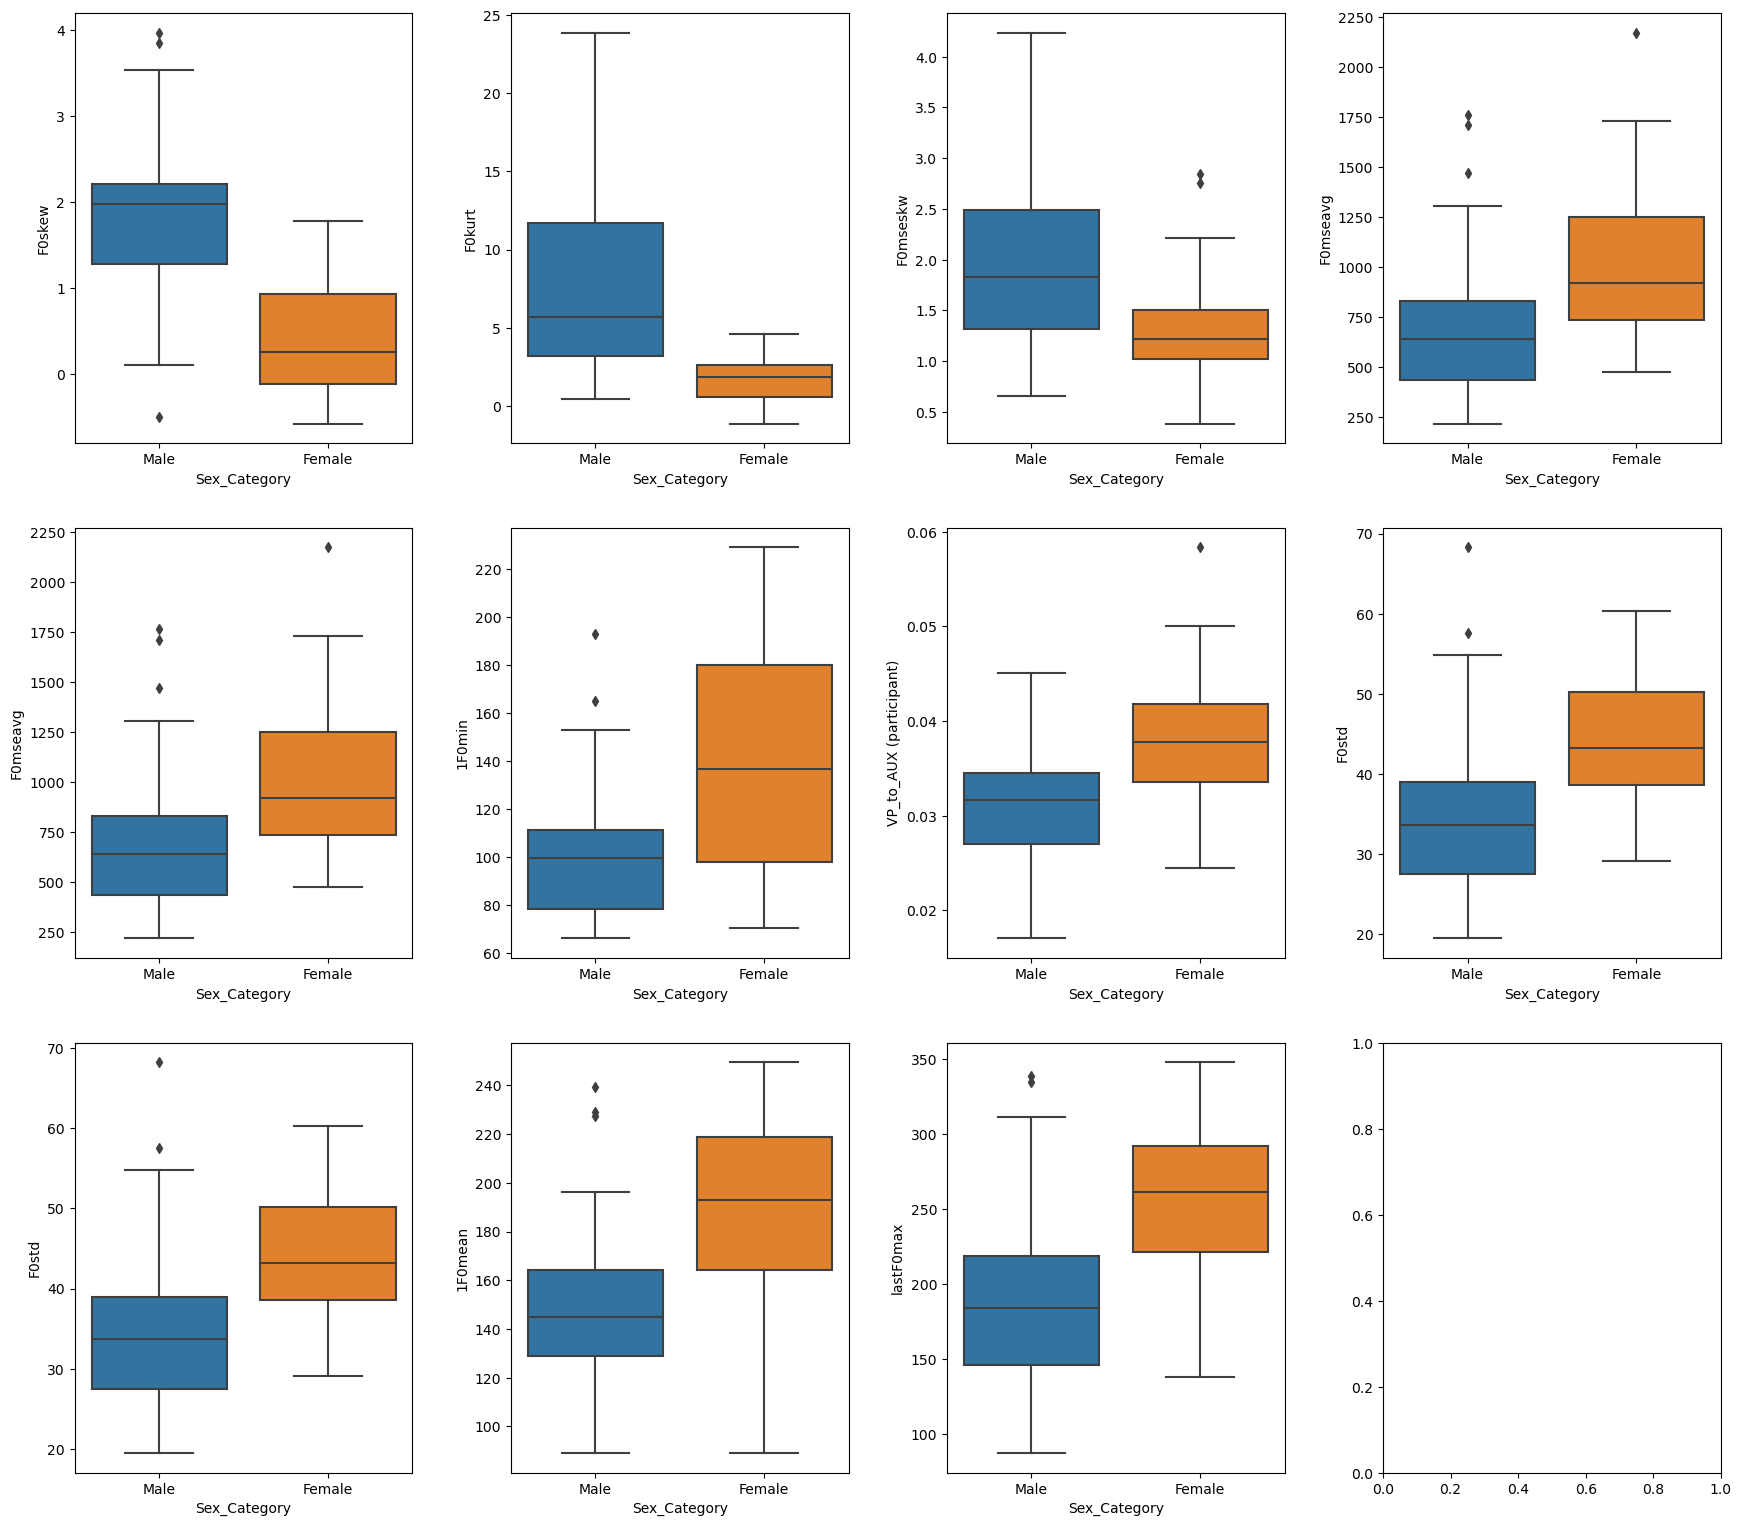

In [47]:
ROW, COL = 3, 4
fig, ax = plt.subplots(ROW,COL,figsize=(18,16))
fig.tight_layout(pad=4.0)
cols = high_corr['Variable'].to_list()
for row in range(ROW):
    for col in range(COL):
        if row*COL + col < len(cols):
            sns.boxplot(x='Sex_Category', y=cols[row*ROW + col], data=to_plot, ax=ax[row][col])

# No Audio

## Variables statistically significant
### p >= 0.95 & p <= 0.05

In [50]:
df = load_raw_data(audio=False)
data = pd.DataFrame(columns=['Variable', 'Corr', 'pvalue'])
for col in df.columns:
    if col != 'Sex_Category':
        info = stats.pointbiserialr(df['Sex_Category'], df[col])
        info = [col, info.statistic, info.pvalue]
        data.loc[len(data.index)] = info

In [51]:
p_val_high = data[np.abs(data['pvalue']) >= 0.95]
p_val_low =  data[np.abs(data['pvalue']) <= 0.05]
p_values = p_val_high.append(p_val_low).sort_values(by='Corr')

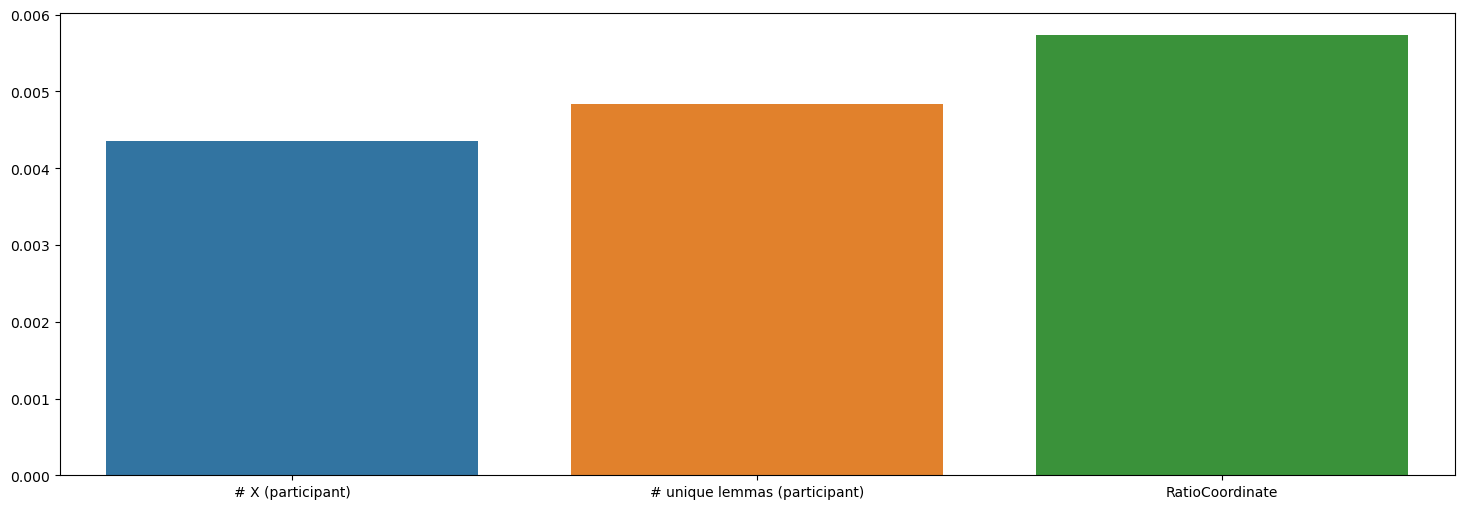

In [52]:
p_val_high = p_val_high.sort_values(by='Corr')
plt.figure(figsize=(18,6))
sns.barplot(y=p_val_high['Corr'].values, x=p_val_high['Variable'].values)
#plt.xticks(rotation=90)
plt.show()

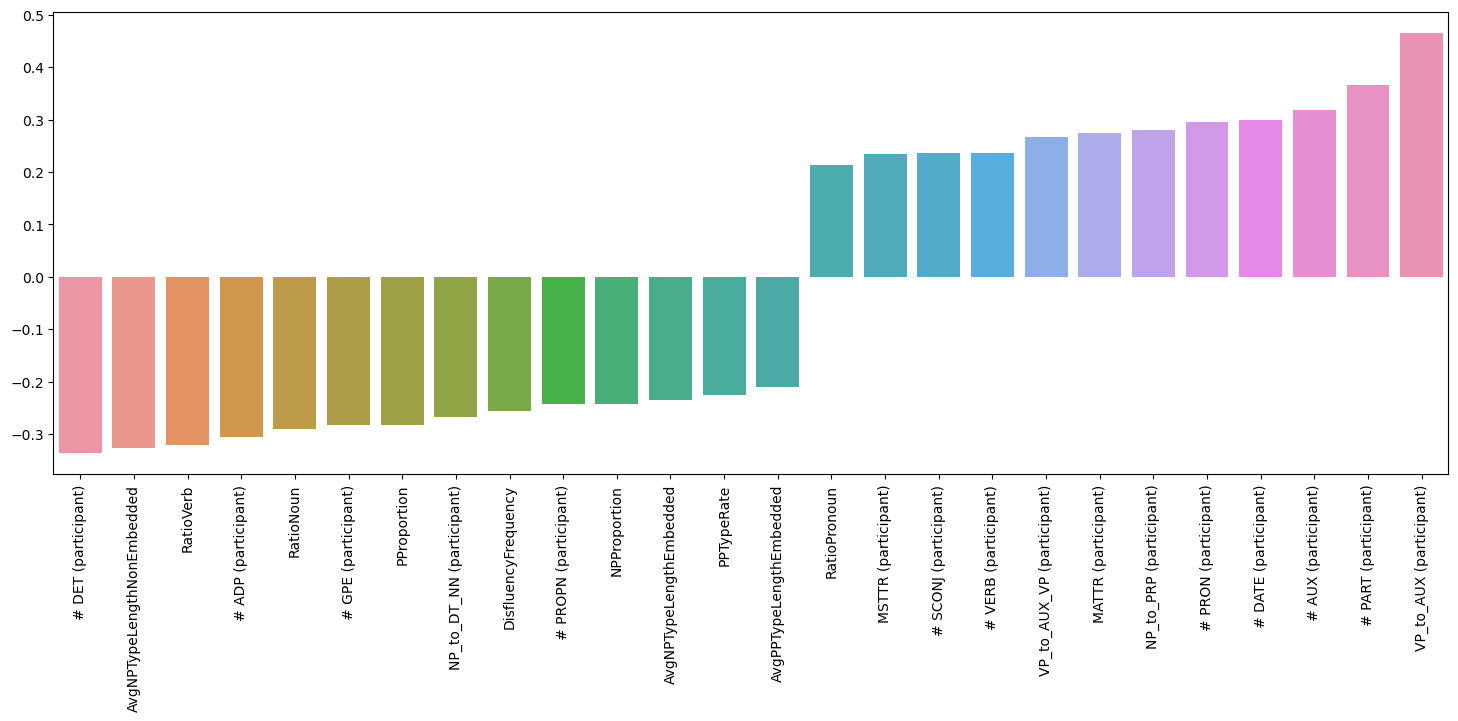

In [54]:
#p_val_low = p_val_low.sort_values(by='Corr')
plt.figure(figsize=(18,6))
sns.barplot(y=p_val_low['Corr'].values, x=p_val_low['Variable'].values)
plt.xticks(rotation=90)
plt.show()

## Visualization

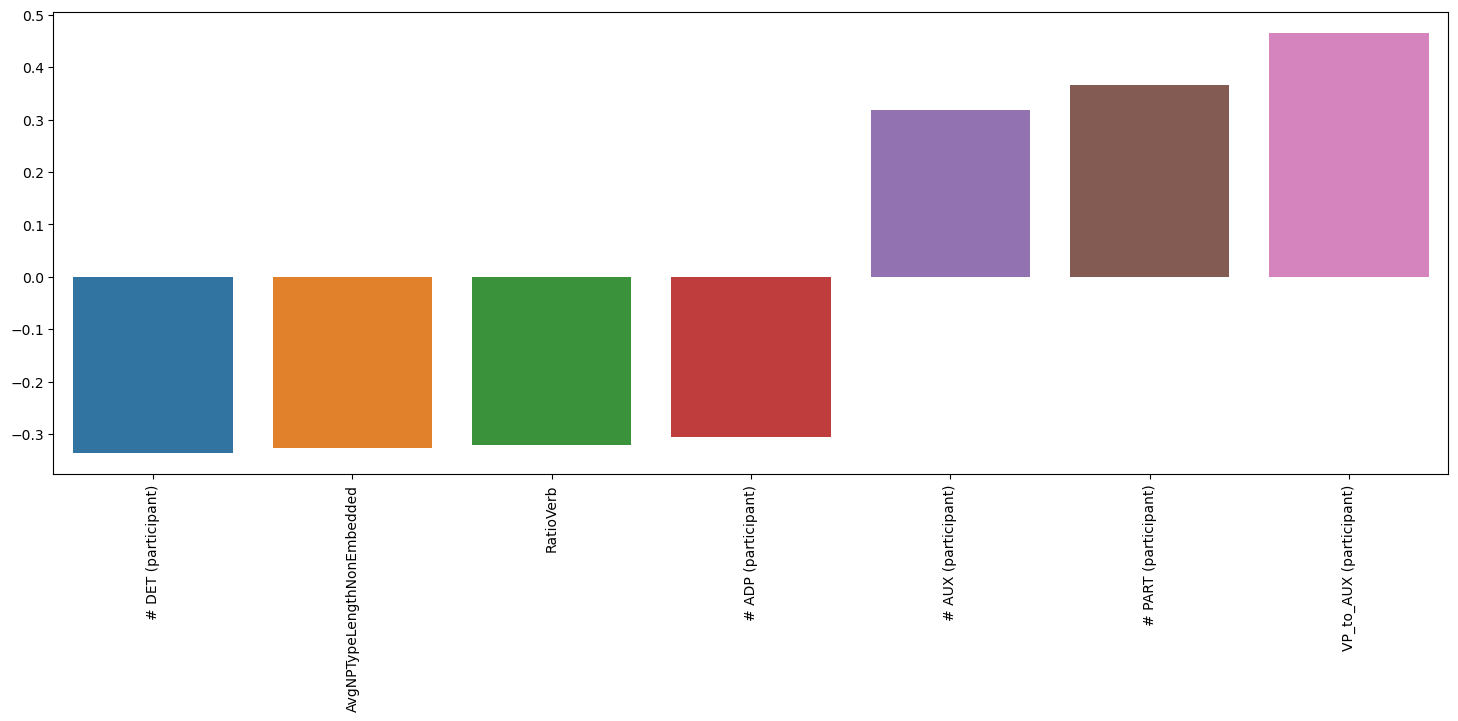

In [55]:
# Using only the ones with high correlation

to_plot = load_raw_data(audio=False, map=False)
high_corr = p_val_low[np.abs(data['Corr']) >= 0.3].sort_values(by='Corr')

plt.figure(figsize=(18,6))
sns.barplot(y=high_corr['Corr'].values, x=high_corr['Variable'].values)
plt.xticks(rotation=90)
plt.show()

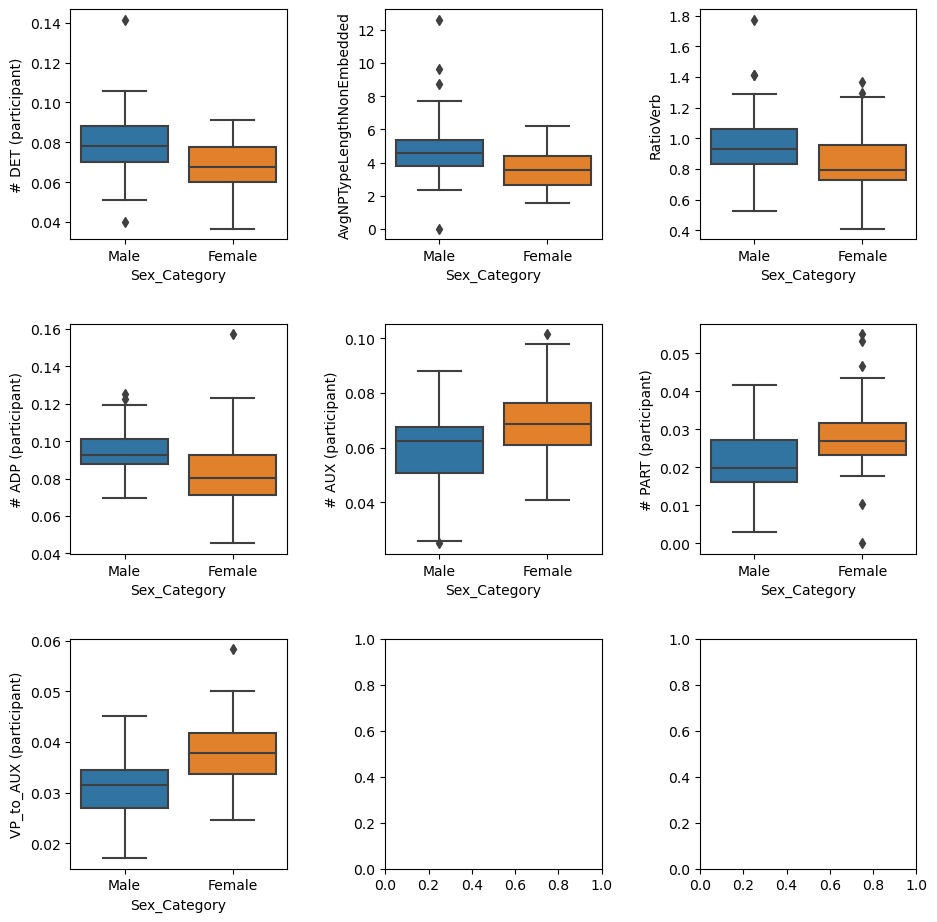

In [59]:
ROW, COL = 3, 3
fig, ax = plt.subplots(ROW,COL,figsize=(10,10))
fig.tight_layout(pad=4.0)
cols = high_corr['Variable'].to_list()
for row in range(ROW):
    for col in range(COL):
        if row*COL + col < len(cols):
            sns.boxplot(x='Sex_Category', y=cols[row*ROW + col], data=to_plot, ax=ax[row][col])